# Project in AI in Industry: Predicting Road Accident Risk

### Imports

In [105]:
%load_ext autoreload
%autoreload 2

from util.data import load_data, clean_data, split_data, train_val_test_split, summarize_columns, normalize
from util.visualizations import plot_frequencies


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Important constants

In [106]:
TRAIN_DATA = "data/train.csv"
TEST_DATA  = "data/test.csv"
TARGET_COL = "accident_risk"

## Preprocess data

### Checking out data

In [107]:
# Fetch train data
data = load_data(TRAIN_DATA)

data_cleaned = clean_data(data)

X, Y = split_data(data_cleaned, TARGET_COL)
X_train, X_val, X_test, Y_train, Y_val, Y_test = train_val_test_split(X, Y)

print(f'''
Sanity checks:

Data: Rows: {len(data)}, Columns: {len(data.columns)},
Sum train, val, test: {len(X_train)+len(X_val)+len(X_test)}

X train length: {len(X_train)}, Columns: {len(X_train.columns)}
X test length: {len(X_test)}, Columns: {len(X_test.columns)}

X val length: {len(X_val)}, Columns: {len(X_val.columns)}
X test length: {len(X_test)}, Columns: {len(X_test.columns)}
''')


Sanity checks:

Data: Rows: 517754, Columns: 14,
Sum train, val, test: 517754

X train length: 414202, Columns: 16
X test length: 51776, Columns: 16

X val length: 51776, Columns: 16
X test length: 51776, Columns: 16



In [108]:
summarize_columns(data)

id: Range: 0 to 517753
road_type: Categories: ['urban', 'rural', 'highway']
num_lanes: Range: 1 to 4
curvature: Range: 0.0 to 1.0
speed_limit: Range: 25 to 70
lighting: Categories: ['daylight', 'dim', 'night']
weather: Categories: ['rainy', 'clear', 'foggy']
road_signs_present: Range: False to True
public_road: Range: False to True
time_of_day: Categories: ['afternoon', 'evening', 'morning']
holiday: Range: False to True
school_season: Range: False to True
num_reported_accidents: Range: 0 to 7
accident_risk: Range: 0.0 to 1.0


In [109]:
summarize_columns(data_cleaned)

num_lanes: Range: 1 to 4
curvature: Range: 0.0 to 1.0
speed_limit: Range: 25 to 70
road_signs_present: Range: 0 to 1
public_road: Range: 0 to 1
holiday: Range: 0 to 1
school_season: Range: 0 to 1
num_reported_accidents: Range: 0 to 7
accident_risk: Range: 0.0 to 1.0
road_type_rural: Range: 0 to 1
road_type_urban: Range: 0 to 1
lighting_dim: Range: 0 to 1
lighting_night: Range: 0 to 1
weather_foggy: Range: 0 to 1
weather_rainy: Range: 0 to 1
time_of_day_evening: Range: 0 to 1
time_of_day_morning: Range: 0 to 1


In [110]:
X_train.head(5)

,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,time_of_day_evening,time_of_day_morning
393568,2,0.86,35,1,0,0,1,1,1,0,1,0,0,1,0,1
259815,3,0.08,70,0,1,1,1,1,1,0,0,1,0,0,0,1
72423,4,0.33,35,0,1,1,1,2,1,0,0,1,0,0,0,1
342049,3,0.10,45,0,1,0,0,0,1,0,0,1,1,0,0,0
47829,3,0.66,45,1,0,0,0,0,1,0,0,1,1,0,0,0


In [111]:
Y_train.head(5)

393568    0.29
259815    0.37
72423     0.24
342049    0.38
47829     0.49
Name: accident_risk, dtype: float64

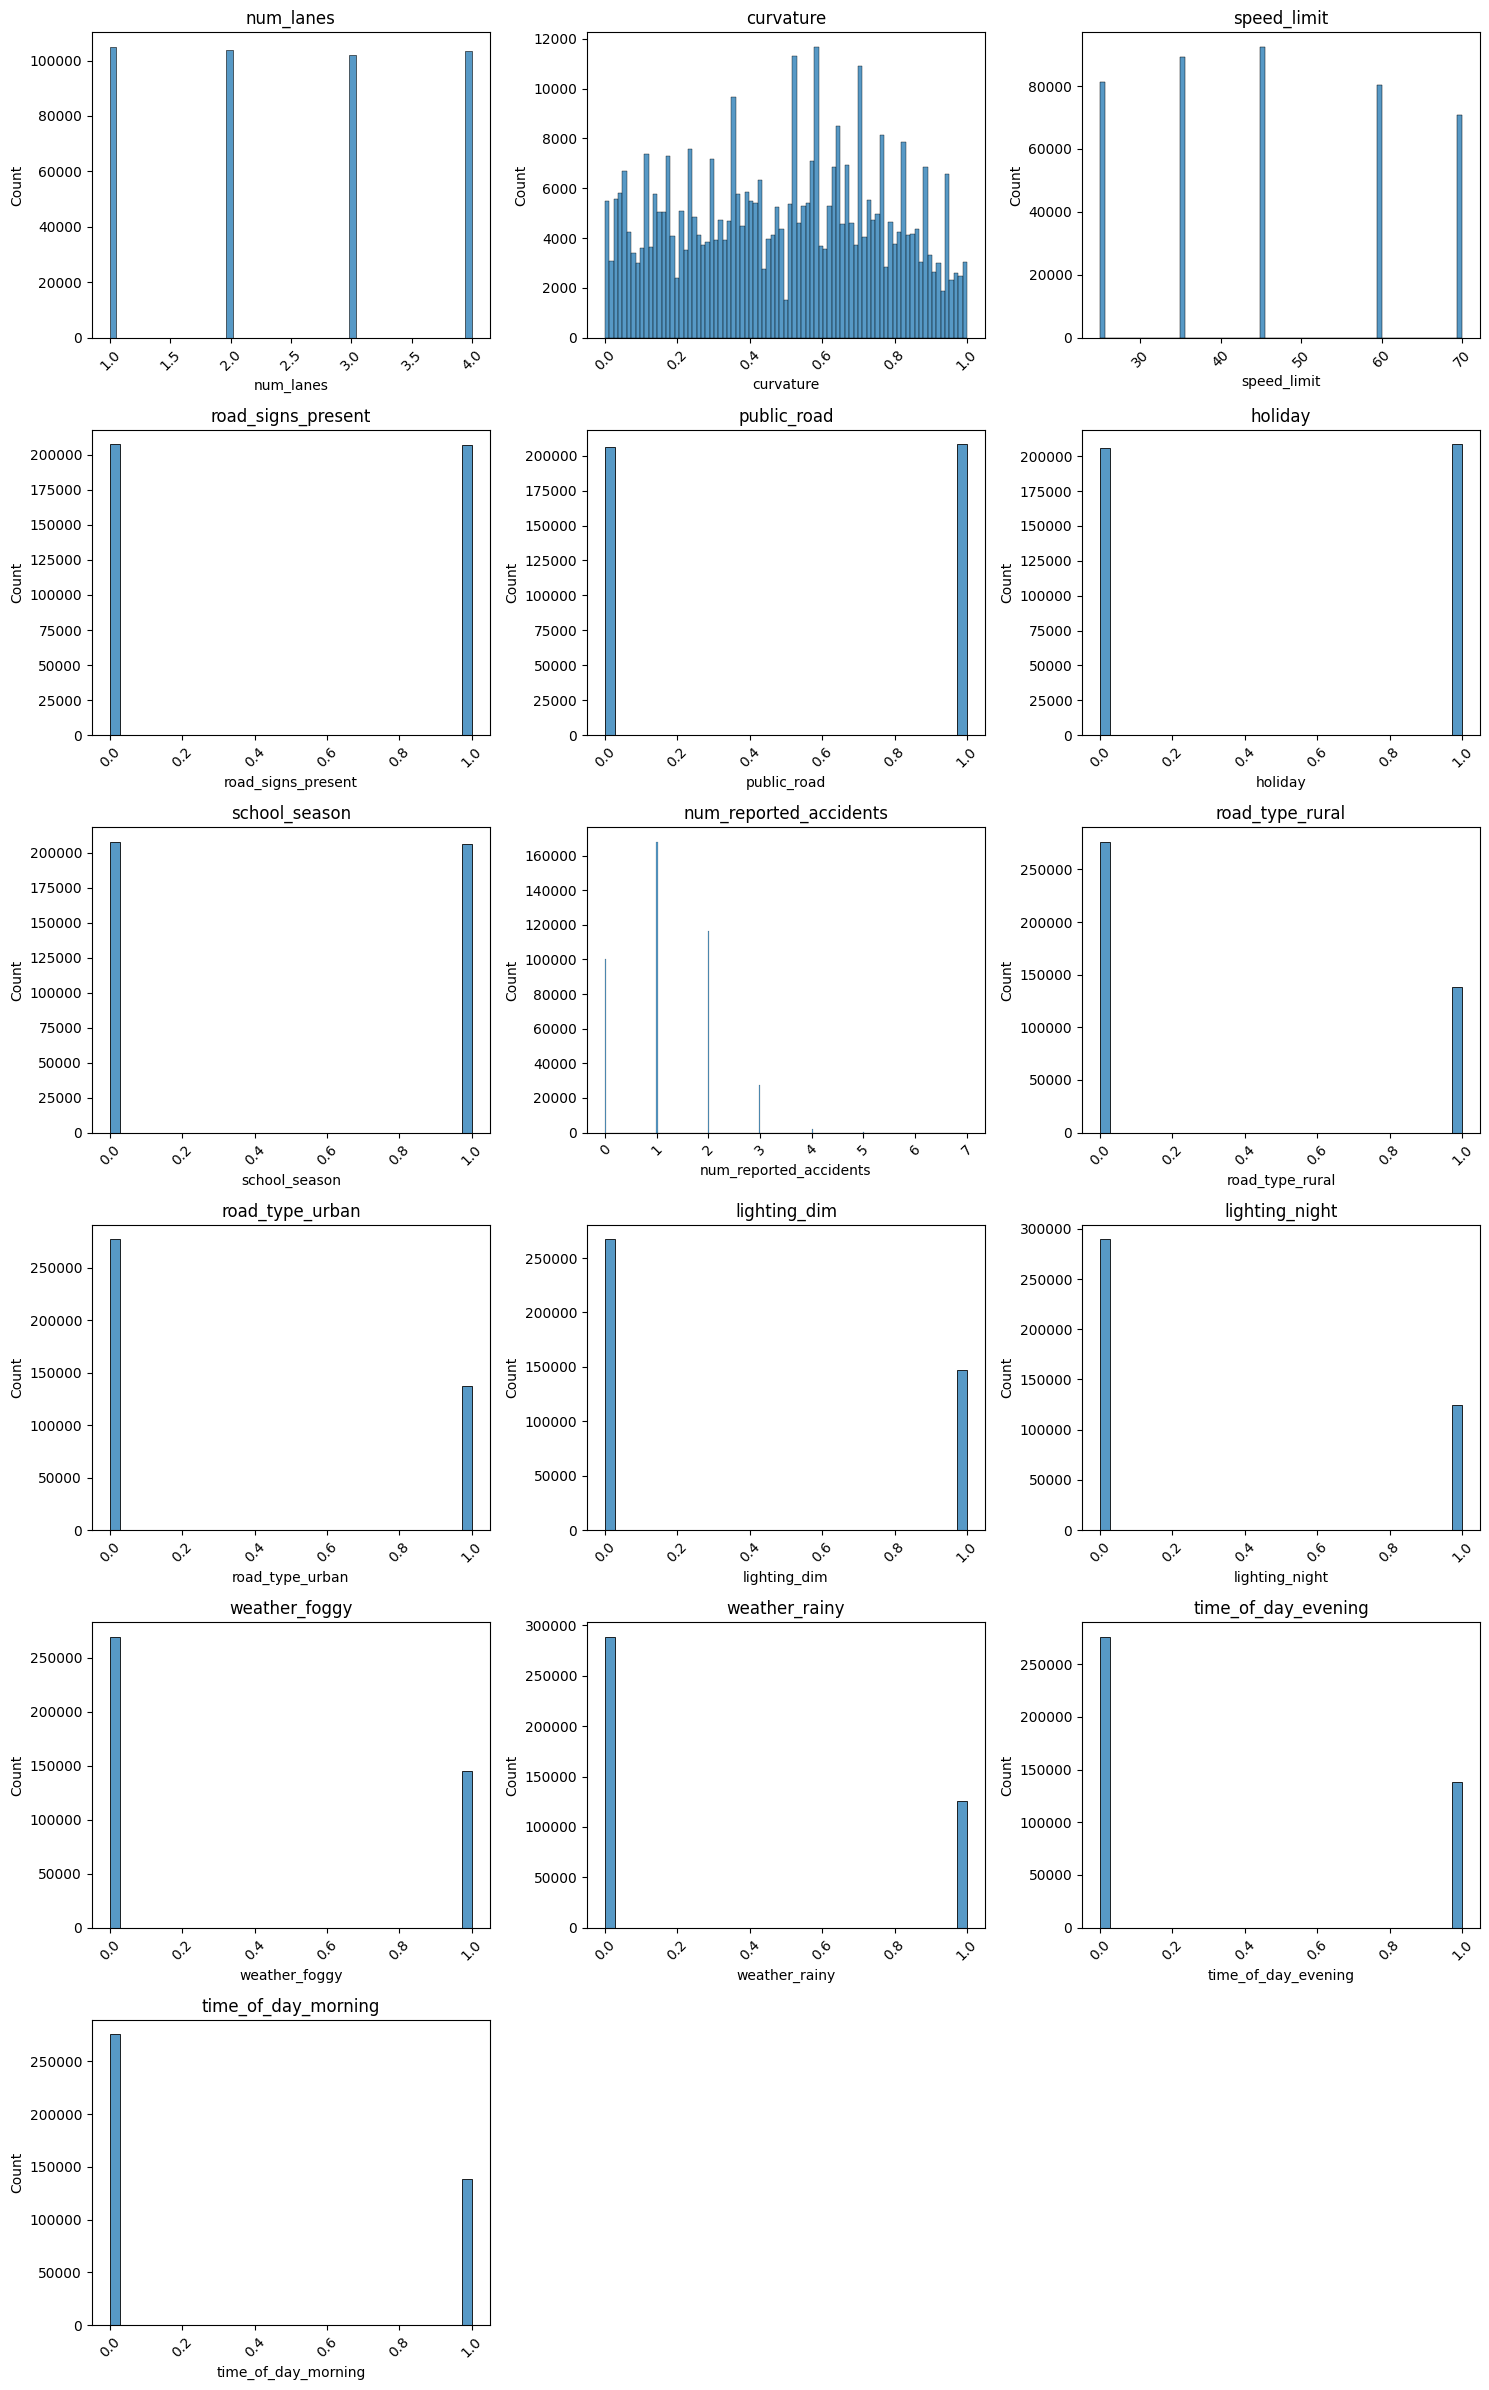

In [112]:
plot_frequencies(X_train)

We see that some features have larger scales, so we normalize them to prevent them from dominating the model.

We just use a Min Max scaler for ``speed_limit`` and ``num_lanes`` as there are no outliers that would shrink the values of the "standard" data.

We use Standard-Scaler for ``num_reported_accidents`` since the outliers would shrink the "standard" data.

In [113]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

features_to_normalize = ["speed_limit", "num_lanes"]
features_to_standardize = ["num_reported_accidents"]

X_train, X_val, X_test = normalize(X_train, X_val, X_test, features_to_normalize, MinMaxScaler())
X_train, X_val, X_test = normalize(X_train, X_val, X_test, features_to_standardize, StandardScaler())

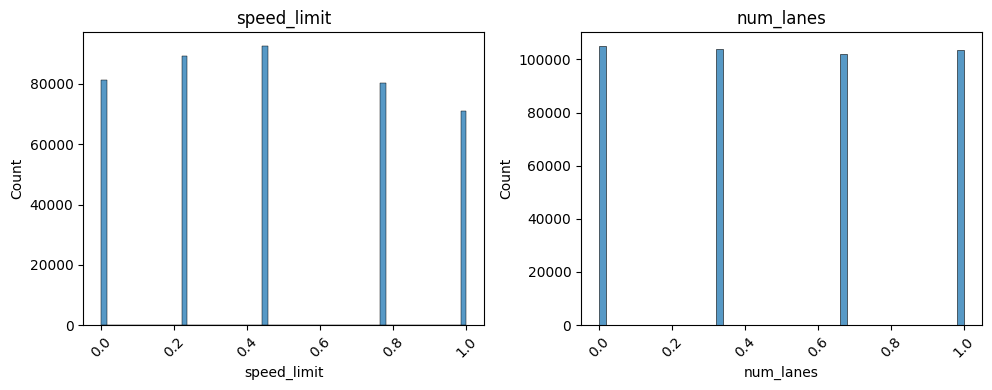

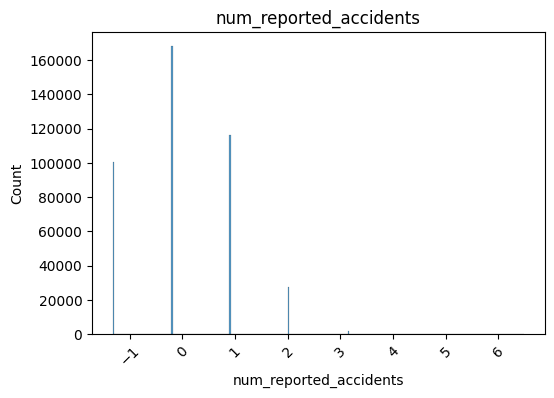

In [115]:
plot_frequencies(X_train[features_to_normalize])
plot_frequencies(X_train[features_to_standardize])

## Testing different models

### Model 1 - ???

### Model 2 - ???

### Model 3 - ???